<a href="https://colab.research.google.com/github/peezedabdullah/predict_alzheimers/blob/main/Data_extraction_cleaning_and_ModelTrainingOn_middleslices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from os import listdir
from tensorflow.keras.preprocessing.image import Iterator
from tensorflow.keras.applications import ResNet50
from PIL import Image as im
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import statistics
from statistics import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
import dill as pickle
#import onnx

In [ ]:
abc=np.load('new_mri_dataset/train/21.npy')

In [ ]:
abc.shape

(62, 96, 96)

In [ ]:
#plt.imshow(abc[0])
#plt.show()

In [ ]:
# rescaled = (255.0 / abc.max() * (abc - abc.min())).astype(np.uint8)
# img = im.fromarray(abc)
# img.save('test.jpeg')

In [ ]:
tr=np.load('dataset/labels/train.npy')
tr_n=dict(np.ndenumerate(tr))

In [ ]:
i=0
k=0
labels={}
for v in tr_n.values():
    if v==1:
        labels[k]=i%3
        k+=1
    i+=1

In [ ]:
vl=np.load('dataset/labels/valid.npy')
vl_n=dict(np.ndenumerate(vl))

In [ ]:
i=0
k=0
labels_v={}
for v in vl_n.values():
    if v==1:
        labels_v[k]=i%3
        k+=1
    i+=1

In [ ]:
te=np.load('dataset/labels/test.npy')
te_n=dict(np.ndenumerate(te))

In [ ]:
i=0
k=0
labels_t={}
for v in te_n.values():
    if v==1:
        labels_t[k]=i%3
        k+=1
    i+=1

In [ ]:
labels_tt=[]
for v in labels_t.values():
    for j in range(5):
     labels_tt.append(v)
    j=j+5

In [ ]:
len(labels_tt)

2345

In [ ]:
labels_test=[] 
for v in labels_t.values():
    labels_test.append(v)

In [ ]:
len(labels_test)

469

In [ ]:
labels_trr=[]
for v in labels.values():
    for j in range(5):
     labels_trr.append(v)
    j=j+5

In [ ]:
len(labels_trr)

10545

# DATA

In [ ]:
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/train_images/0/%d.png' %i)
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/train_images/1/%d.png' %i)
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/train_images/2/%d.png' %i)

In [ ]:
for i in range(435):
    if labels_v[i]==0:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/valid_images/0/%d.png' %i)
    elif labels_v[i]==1:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/valid_images/1/%d.png' %i)
    else:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/valid_images/2/%d.png' %i)

In [ ]:
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/test_images/0/%d.png' %i)
    elif labels_t[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/test_images/1/%d.png' %i)
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[33]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     img = im.fromarray(rescaled)
     img.save('dataset/test_images/2/%d.png' %i)

In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      for j in range(5):
            img=im.fromarray(rescaled[j])
            img.save('dataset/test_images5/%d_%d.png'%(i,j))
#     elif labels_t[i]==1:
#       arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]  
#       rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
#       for j in range(5):
#             img=im.fromarray(rescaled[j])
#             img.save('dataset/testt_images/1/%d_%d.png'%(i,j)) 
#     else:
#       arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]  
#       rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
#       for j in range(5):
#             img=im.fromarray(rescaled[j])
#             img.save('dataset/testt_images/2/%d_%d.png'%(i,j))  



In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[29]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      img=im.fromarray(rescaled)
      img.save('dataset/5middle/29/%d.png'%i)

In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[30]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      img=im.fromarray(rescaled)
      img.save('dataset/5middle/30/%d.png'%i)

In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[31]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      img=im.fromarray(rescaled)
      img.save('dataset/5middle/31/%d.png'%i)

In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[32]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      img=im.fromarray(rescaled)
      img.save('dataset/5middle/32/%d.png'%i)

In [ ]:
for i in range(469):
      arr=np.load('new_mri_dataset/test/%d.npy' %i)[33]  
      rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
      img=im.fromarray(rescaled)
      img.save('dataset/5middle/33/%d.png'%i)

In [ ]:
<!-- train5 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images5/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images5/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images5/2/%d_%d.png' %(i,j))

In [ ]:
<!-- valid5 -->
for i in range(435):
    if labels_v[i]==0:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/valid_images5/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/valid_images5/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/valid/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/valid_images5/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test5 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen5/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen5/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:34]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(5):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen5/2/%d_%d.png' %(i,j))

In [ ]:
<!-- train6 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images6/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images6/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images6/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test6 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen6/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen6/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[29:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(6):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen6/2/%d_%d.png' %(i,j))

In [ ]:
<!-- train7 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images7/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images7/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images7/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test7 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen7/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen7/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:35]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(7):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen7/2/%d_%d.png' %(i,j))

In [ ]:
<!-- train8 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images8/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images8/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images8/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test8 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen8/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen8/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[28:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(8):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen8/2/%d_%d.png' %(i,j))

In [ ]:
<!-- train9 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images9/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images9/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images9/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test9 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen9/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen9/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[27:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(9):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen9/2/%d_%d.png' %(i,j))

In [ ]:
<!-- train10 -->
for i in range(2109):
    if labels[i]==0:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images10/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images10/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/train/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/train_images10/2/%d_%d.png' %(i,j))

In [ ]:
<!-- test10 -->
for i in range(469):
    if labels_t[i]==0:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen10/0/%d_%d.png' %(i,j))   
    elif labels[i]==1:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen10/1/%d_%d.png' %(i,j))
    else:
     arr=np.load('new_mri_dataset/test/%d.npy' %i)[26:36]
     rescaled = (255.0 / arr.max() * (arr - arr.min())).astype(np.uint8)
     for j in range(10):
         img = im.fromarray(rescaled[j])
         img.save('dataset/test_images_gen10/2/%d_%d.png' %(i,j))

In [ ]:
# train_labels=np.load('dataset/labels/train.npy')
# valid_labels=np.load('dataset/labels/valid.npy')
# test_labels=np.load('dataset/labels/test.npy')

In [ ]:
train_path='dataset/train_images'
valid_path='dataset/valid_images'
test_path='dataset/test_images'

In [ ]:
# train_path5='dataset/train_images5'
# valid_path5='dataset/valid_images5'
# test_path5='dataset/test_images_gen5'

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
.flow_from_directory(directory=train_path,target_size=(224,224),classes=['0','1','2'],batch_size=32)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['0','1','2'],batch_size=32,shuffle=False)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['0','1','2'],batch_size=32)

Found 2109 images belonging to 3 classes.
Found 469 images belonging to 3 classes.
Found 435 images belonging to 3 classes.


In [ ]:
# train_batches5=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
# .flow_from_directory(directory=train_path5,target_size=(224,224),classes=['0','1','2'],batch_size=32)
# valid_batches5=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
# .flow_from_directory(directory=valid_path5,target_size=(224,224),classes=['0','1','2'],batch_size=32)
# test_batches5=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
# .flow_from_directory(directory=test_path5,target_size=(224,224),classes=['0','1','2'],batch_size=32,shuffle=False)

Found 10545 images belonging to 3 classes.
Found 2175 images belonging to 3 classes.
Found 2345 images belonging to 3 classes.


In [ ]:
imgs,labls =next(train_batches)

In [ ]:
def plotImages(arr):
    fig,axes=plt.subplots(4,8,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

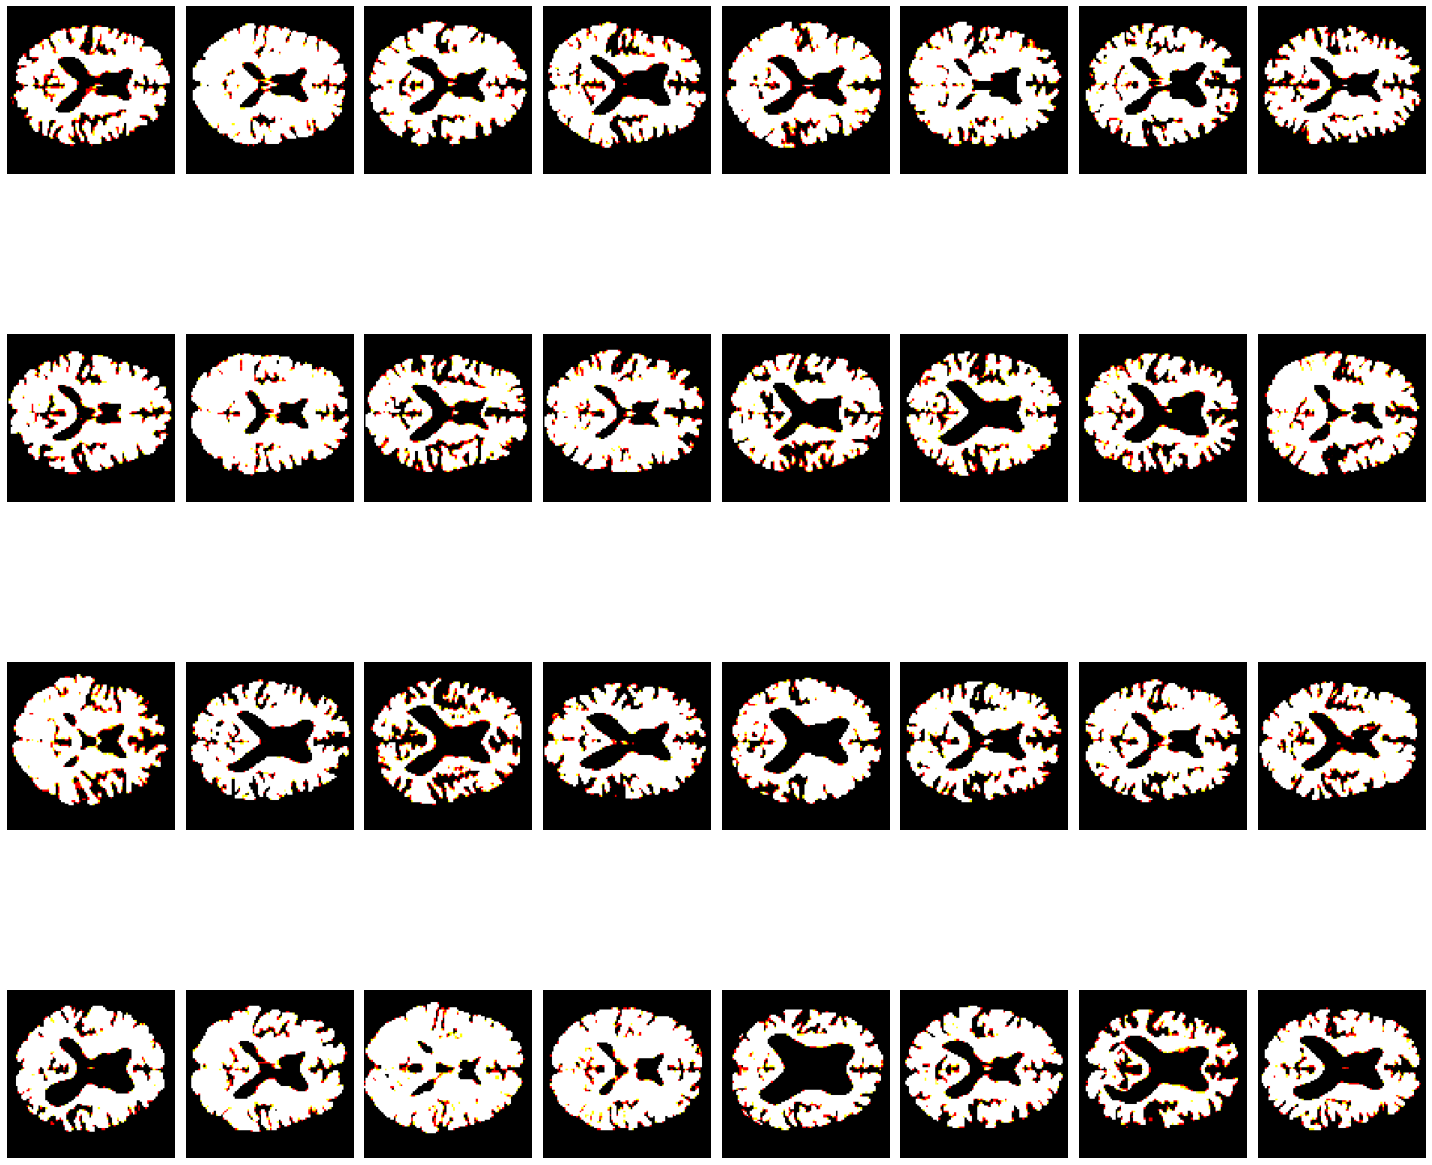

In [ ]:
plotImages(imgs)
#print(labels)

# Model 

In [ ]:
resnet50 = tf.keras.applications.resnet.ResNet50(weights = "imagenet", 
                           #include_top=False, 
                           input_shape = (224, 224, 3),
                           pooling='max')

In [ ]:
resnet50.summary()

In [ ]:
X=resnet50.layers[-2].output
output= Dense(units=3,activation='softmax')(X)

In [ ]:
model=keras.Model(inputs=resnet50.input,outputs= output)

In [ ]:
for layer in model.layers[:-53]:
    layer.trainable=False

In [ ]:
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training and Evaluation

In [ ]:
history = model.fit(x=train_batches,validation_data=valid_batches,epochs=30,verbose=1)

In [ ]:
model = tf.keras.models.load_model('dataset/md4.h5')

In [ ]:
model.summary()

In [ ]:
results = model.evaluate(test_batches, batch_size=64) #test batches contain middle slice of mris

 6/74 [=>............................] - ETA: 4:05 - loss: 1.7089 - accuracy: 0.6302

In [ ]:
predictions=model.predict(test_batches,verbose=1)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
np.round(predictions)

In [ ]:
test_batches.classes

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels=['0','1','2']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix I')